# Sentiment Analysis of Audience Reactions in Avengers: Endgame
## MULTIMEDIA UNIVERSITY


#### SOCIAL MEDIA COMPUTING – CDS6344 
#### TRIMESTER , Session 2024/2025

#### By : SURENTHIRAN A/L SHAMOSAMUGAM NATHAN 1211104053


#### Data Cleaning 

In [1]:
import pandas as pd
import re

df = pd.read_csv('tweets.csv')

def clean_text(text):
 
    text = text.lower()
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'#\w+', '', text)
    text = re.sub(r'@\w+', '', text)
    text = re.sub(r'http\S+|www\.\S+', '', text)
    text = text.strip()
    text = re.sub(r'\brt\s*:\s*', '', text, flags=re.IGNORECASE)
    text = re.sub(r'\r\n', ' ', text)
    text = re.sub(r'<u\+\w+>', '', text)
    text = text.replace('!', '')
    text = text.replace('?', '')
    text = re.sub(r'<u\+>', '', text)  
    text = re.sub(r'[©\':.,|]', '', text)  
    text = re.sub(r'\s+', ' ', text).strip()
    return text


df['clean_text'] = df['text'].apply(clean_text)


df = df.dropna(subset=['clean_text'])


df.to_csv('tweets_cleaned.csv', index=False)

print("Data cleaned and saved to 'tweets_cleaned.csv'.")


Data cleaned and saved to 'tweets_cleaned.csv'.


In [2]:
print(df.columns)


Index(['Unnamed: 0', 'text', 'favorited', 'favoriteCount', 'replyToSN',
       'created', 'truncated', 'replyToSID', 'id', 'replyToUID',
       'statusSource', 'screenName', 'retweetCount', 'isRetweet', 'retweeted',
       'longitude', 'latitude', 'clean_text'],
      dtype='object')


#### Below is the progress after cleaning the data. There are the original text and the one after been cleaned up. 

#### In the "text" column, there are so many unnecessary text/symbol that are not useful. In the "clean_text" column, it's easier to read and will be much faster to process the data. 

In [3]:
import pandas as pd

# Specify the file path
file_path = 'tweets_cleaned.csv'

# Load the dataset
data = pd.read_csv(file_path)

# View the first few rows
data.head()


,Unnamed: 0,text,favorited,favoriteCount,replyToSN,created,truncated,replyToSID,id,replyToUID,statusSource,screenName,retweetCount,isRetweet,retweeted,longitude,latitude,clean_text
0,1,RT @mrvelstan: literally nobody:\r\nme:\r\n\r\...,False,0,NaN,23/4/2019 10:43,False,NaN,1.120640e+18,NaN,"<a href=""http://twitter.com/download/android"" ...",DavidAc96,637,True,False,NaN,NaN,literally nobody me
1,2,"RT @agntecarter: i’m emotional, sorry!!\r\n\r\...",False,0,NaN,23/4/2019 10:43,False,NaN,1.120640e+18,NaN,"<a href=""http://twitter.com/download/iphone"" r...",NRmalaa,302,True,False,NaN,NaN,i’m emotional sorry x
2,3,saving these bingo cards for tomorrow \r\n©\r\...,False,0,NaN,23/4/2019 10:43,False,NaN,1.120640e+18,NaN,"<a href=""http://twitter.com/download/iphone"" r...",jijitsuu,0,False,False,NaN,NaN,saving these bingo cards for tomorrow
3,4,RT @HelloBoon: Man these #AvengersEndgame ads ...,False,0,NaN,23/4/2019 10:43,False,NaN,1.120640e+18,NaN,"<a href=""http://twitter.com/download/iphone"" r...",SahapunB,23781,True,False,NaN,NaN,man these ads are everywhere
4,5,"RT @Marvel: We salute you, @ChrisEvans! #Capta...",False,0,NaN,23/4/2019 10:43,False,NaN,1.120640e+18,NaN,"<a href=""http://twitter.com/download/iphone"" r...",stella22_97,13067,True,False,NaN,NaN,we salute you


#### Below are the first 60 text from "clean_text" column from tweets.csv.

In [4]:
# Adjust display option
pd.set_option('display.max_colwidth', None)

# View the first few rows with full text


data[['clean_text']].head(60)

,clean_text
0,literally nobody me
1,i’m emotional sorry x
2,saving these bingo cards for tomorrow
3,man these ads are everywhere
4,we salute you
5,the first non-spoiler critic reactions are here and nearly all are exceptionally positive with many prais…
6,ready to rock
7,we’re with him ‘til the end of the line
8,first reactions most emotional most epic mcu film
9,man these ads are everywhere


#### Below are the last 60 text from "clean_text" column from tweets.csv.

In [5]:
# Adjust display option
pd.set_option('display.max_colwidth', None)

# View the first few rows with full text


data[['clean_text']].tail(60)

,clean_text
14940,man these ads are everywhere
14941,honestly chris evans saying he cried six times and hemsworth saying he cried more than six times means that we’re all literal…
14942,let’s bring our a game on &amp; get this one right releases this friday book your tickets on
14943,we’re with him ‘til the end of the line
14944,man these ads are everywhere
14945,comic con they were first seen as the avengers the last time they will be together
14946,we salute you
14947,we salute you
14948,as we get closer to the we will do to make you watch the great grand finale rt an…
14949,both scarlett and brie are with the infinity stones as rings but until now just them this means something …


#### nltk stands for Natural Language Toolkit. 

#### NLTK (Natural Language Toolkit) is a popular Python library used for natural language processing (NLP) tasks. It provides a wide range of tools and resources to work with human language data, such as text, and perform tasks like tokenization, stemming, lemmatization, and sentiment analysis.

In [1]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [4]:
import nltk
from nltk.tokenize import word_tokenize


nltk.download('punkt')


def process_text(text):
    tokens = word_tokenize(text)
    tokens = [token.lower() for token in tokens]
    return ' '.join(tokens)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [16]:
from tabulate import tabulate
import pandas as pd


df = pd.read_csv('tweets_processed.csv')
columns_to_display = ['Unnamed: 0', 'clean_text', 'processed_text']
print(tabulate(df[columns_to_display].head(10), headers="keys", tablefmt="grid"))


+----+--------------+------------------------------------------------------------------------------------------------------------+----------------------------------------------------------+
|    |   Unnamed: 0 | clean_text                                                                                                 | processed_text                                           |
+====+==============+============================================================================================================+==========================================================+
|  0 |            1 | literally nobody me                                                                                        | literally nobody                                         |
+----+--------------+------------------------------------------------------------------------------------------------------------+----------------------------------------------------------+
|  1 |            2 | i’m emotional sorry x       

In [17]:
import pandas as pd
from nltk.tokenize import word_tokenize
df = pd.read_csv('tweets_cleaned.csv')


sample_text = df['clean_text'][0]
tokens = word_tokenize(sample_text)
print(tokens)


['literally', 'nobody', 'me']


In [18]:
from nltk.corpus import stopwords

# Load stopwords for English
stop_words = set(stopwords.words('english'))

# Remove stopwords from the tokens
filtered_tokens = [word for word in tokens if word.lower() not in stop_words]
print(filtered_tokens)


['literally', 'nobody']


In [19]:
from nltk.tokenize import word_tokenize

# Define process_text if not already defined
def process_text(text):
    tokens = word_tokenize(text)
    tokens = [token.lower() for token in tokens]
    return ' '.join(tokens)

# Apply the function to the 'clean_text' column
if 'clean_text' in df.columns:
    df['processed_text'] = df['clean_text'].apply(process_text)
else:
    print("The column 'clean_text' does not exist in the DataFrame.")


#### nltk.tokenize.word_tokenize: This function from the Natural Language Toolkit (NLTK) is used to split a sentence into individual words (tokens).

#### There are some words that can't be removed such as ("’", "…", "ads", "rt", "man"). This has to done manually.

In [21]:
from nltk.corpus import stopwords
from nltk.probability import FreqDist
from nltk.tokenize import word_tokenize
import string

# Define stopwords and custom words to remove
stop_words = set(stopwords.words('english'))  # Standard stopwords
custom_stopwords = {"’", "…", "ads", "rt", "man"}  # Custom words to remove

# Tokenize words from 'processed_text' column and remove stopwords & unwanted words
if 'processed_text' in df.columns:
    all_tokens = [
        word.lower() for text in df['processed_text'] 
        for word in word_tokenize(text) 
        if word.lower() not in stop_words and word.lower() not in custom_stopwords and word not in string.punctuation
    ]
    fdist = FreqDist(all_tokens)
    print(fdist.most_common(20))  # Print top 20 words after filtering
else:
    print("The column 'processed_text' does not exist in the DataFrame.")


[('premiere', 1609), ('everywhere', 1456), ('marvel', 1084), ('scarlett', 970), ('win', 952), ('cried', 894), ('chris', 891), ('like', 867), ('salute', 823), ('world', 790), ('johansson', 715), ('chance', 688), ('get', 677), ('carpet', 677), ('evans', 614), ('movie', 614), ('times', 603), ('follow', 579), ('six', 564), ('exclusive', 521)]


#### This are the 20 most used words

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Number of distinct words: 3428


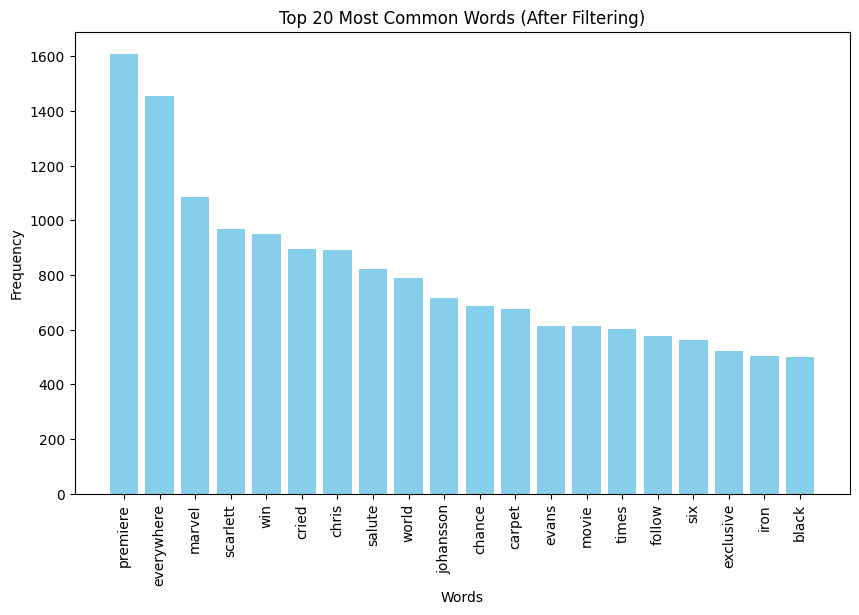

In [24]:
import pandas as pd
import nltk
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.probability import FreqDist

# Download necessary NLTK resources if not already done
nltk.download('punkt')
nltk.download('stopwords')

# Load dataset
df = pd.read_csv('tweets_cleaned.csv')

# Define standard stopwords and custom words to remove
stop_words = set(stopwords.words('english'))  # Standard stopwords
custom_stopwords = {"’", "…", "ads", "rt", "man", "like", "get"}  # Custom words to remove

# Ensure 'clean_text' column exists
if 'clean_text' in df.columns:
    # Tokenize and convert to lowercase
    df['tokens'] = df['clean_text'].apply(lambda x: word_tokenize(str(x).lower()))
    
    # Remove stopwords, custom words, and non-alphabetic tokens
    df['filtered_tokens'] = df['tokens'].apply(lambda x: [word for word in x if word.isalpha() and word not in stop_words and word not in custom_stopwords])

    # Flatten the list of tokens
    all_tokens = [word for tokens in df['filtered_tokens'] for word in tokens]

    # Create frequency distribution
    fdist = FreqDist(all_tokens)

    # Debugging: Print the number of distinct words
    print(f"Number of distinct words: {len(fdist)}")

    # Get the 20 most common words
    top_20 = fdist.most_common(20)

    # Separate words and their frequencies
    words, frequencies = zip(*top_20)

    # Plot bar chart
    plt.figure(figsize=(10, 6))
    plt.bar(words, frequencies, color='skyblue')

    # Rotate x-axis labels for better readability
    plt.xticks(rotation=90)

    # Add labels and title
    plt.xlabel('Words')
    plt.ylabel('Frequency')
    plt.title('Top 20 Most Common Words (After Filtering)')

    # Show the plot
    plt.show()

else:
    print("The column 'clean_text' does not exist in the DataFrame. Please check your dataset.")


#### This are 20 most least used words. The probability of these words are use is only 1 in the whole database. 

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Number of distinct words: 3425


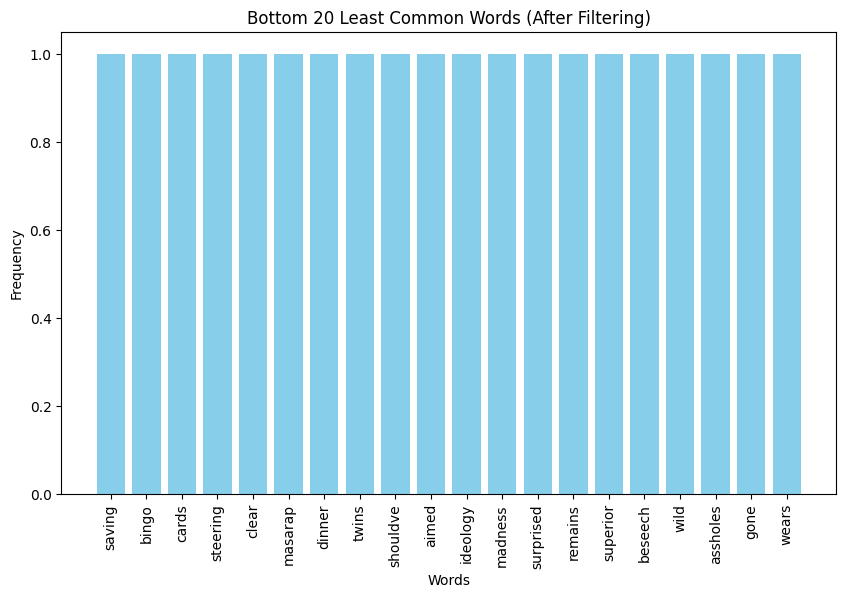

In [28]:
import pandas as pd
import nltk
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.probability import FreqDist

# Download necessary NLTK resources if not already done
nltk.download('punkt')
nltk.download('stopwords')

# Load dataset
df = pd.read_csv('tweets_cleaned.csv')

# Define standard stopwords and custom words to remove
stop_words = set(stopwords.words('english'))  # Standard stopwords
custom_stopwords = {"rod", "aghhhh", "mag", "haha", "dito", "parang", "youhuh", "ummm"}  # Custom words to remove

# Ensure 'clean_text' column exists
if 'clean_text' in df.columns:
    # Tokenize and convert to lowercase
    df['tokens'] = df['clean_text'].apply(lambda x: word_tokenize(str(x).lower()))
    
    # Remove stopwords, custom words, and non-alphabetic tokens
    df['filtered_tokens'] = df['tokens'].apply(lambda x: [word for word in x if word.isalpha() and word not in stop_words and word not in custom_stopwords])

    # Flatten the list of tokens
    all_tokens = [word for tokens in df['filtered_tokens'] for word in tokens]

    # Create frequency distribution
    fdist = FreqDist(all_tokens)

    # Debugging: Print the number of distinct words
    print(f"Number of distinct words: {len(fdist)}")

    # Get the 20 least common words
    bottom_20 = sorted(fdist.items(), key=lambda x: x[1])[:20]  # Sort by frequency (ascending)

    # Separate words and their frequencies
    words, frequencies = zip(*bottom_20)

    # Plot bar chart for bottom 20 words
    plt.figure(figsize=(10, 6))
    plt.bar(words, frequencies, color='skyblue')

    # Rotate x-axis labels for better readability
    plt.xticks(rotation=90)

    # Add labels and title
    plt.xlabel('Words')
    plt.ylabel('Frequency')
    plt.title('Bottom 20 Least Common Words (After Filtering)')

    # Show the plot
    plt.show()

else:
    print("The column 'clean_text' does not exist in the DataFrame. Please check your dataset.")


#### NLTK’s VADER sentiment analyzer to assign sentiment scores to each tweet/review.
#### ✅ Calculates compound sentiment scores, which indicate whether the sentiment is positive, negative, or neutral.
#### ✅ Stores the sentiment score in a new column called sentiment.
#### ✅ Prints the first few rows of the dataset showing text vs. sentiment score.

In [15]:
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Download required NLTK resources
nltk.download('vader_lexicon')

# Load dataset
df = pd.read_csv('tweets_processed.csv')

# Check available columns
print("Available columns:", df.columns)

# Ensure 'processed_text' exists before applying sentiment analysis
if 'processed_text' in df.columns:
    # Initialize VADER Sentiment Analyzer
    sid = SentimentIntensityAnalyzer()

    # Apply sentiment analysis to get compound sentiment score
    df['sentiment'] = df['processed_text'].apply(lambda x: sid.polarity_scores(str(x))['compound'])

    # Define function to classify sentiment
    def classify_sentiment(score):
        if score > 0.05:
            return "Positive"
        elif score < -0.05:
            return "Negative"
        else:
            return "Neutral"

    # Apply classification function
    df['sentiment_label'] = df['sentiment'].apply(classify_sentiment)

    # Print first few rows to check the output
    print(df[['processed_text', 'sentiment', 'sentiment_label']].head())

    # Save the output to a new CSV file
    df.to_csv('tweets_sentiment.csv', index=False)
    print("Sentiment analysis results saved to 'tweets_sentiment.csv'.")

else:
    print("The column 'processed_text' does not exist in the DataFrame. Please check your dataset.")


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Available columns: Index(['Unnamed: 0', 'text', 'favorited', 'favoriteCount', 'replyToSN',
       'created', 'truncated', 'replyToSID', 'id', 'replyToUID',
       'statusSource', 'screenName', 'retweetCount', 'isRetweet', 'retweeted',
       'longitude', 'latitude', 'clean_text', 'processed_text'],
      dtype='object')
               processed_text  sentiment sentiment_label
0            literally nobody     0.0000         Neutral
1           emotional sorry x     0.0772        Positive
2  saving bingo card tomorrow     0.0000         Neutral
3           man ad everywhere     0.0000         Neutral
4                      salute     0.0000         Neutral
Sentiment analysis results saved to 'tweets_sentiment.csv'.


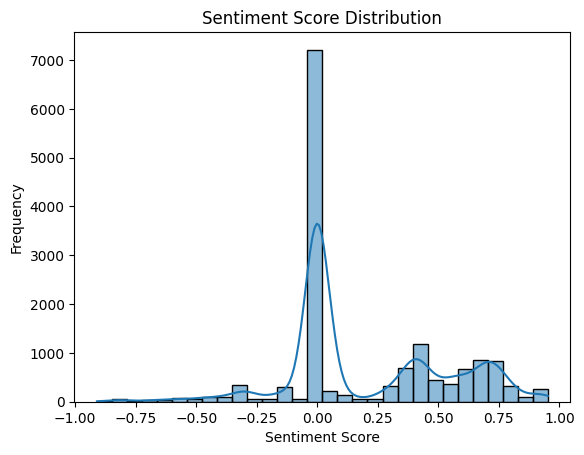

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('tweets_with_sentiment.csv')

sns.histplot(df['sentiment'], bins=30, kde=True)
plt.title("Sentiment Score Distribution")
plt.xlabel("Sentiment Score")
plt.ylabel("Frequency")
plt.show()


#### The dot graph below shows the sentiment scores

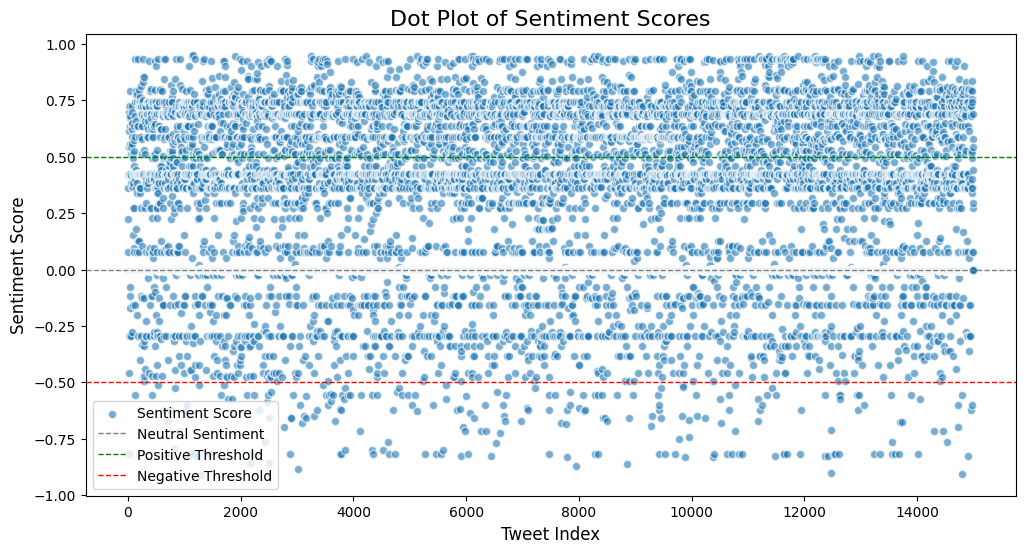

In [9]:
import matplotlib.pyplot as plt

# Create a dot plot
plt.figure(figsize=(12, 6))

# Plot the sentiment scores as a dot plot
plt.scatter(df.index, df['sentiment'], alpha=0.6, edgecolors='w', label='Sentiment Score')

# Add horizontal lines for reference
plt.axhline(y=0.0, color='gray', linestyle='--', linewidth=1, label='Neutral Sentiment')
plt.axhline(y=0.5, color='green', linestyle='--', linewidth=1, label='Positive Threshold')
plt.axhline(y=-0.5, color='red', linestyle='--', linewidth=1, label='Negative Threshold')

# Add labels and title
plt.title('Dot Plot of Sentiment Scores', fontsize=16)
plt.xlabel('Tweet Index', fontsize=12)
plt.ylabel('Sentiment Score', fontsize=12)

# Add a legend
plt.legend()

# Display the plot
plt.show()


#### TextBlob is a free, open-source library in Python for processing textual data. It is a powerful package that reduces the complexity of the contextual data and derives in-depth information from the text.

In [17]:
import pandas as pd
import nltk
from textblob import TextBlob
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Download required NLTK resources
nltk.download('vader_lexicon')
nltk.download('punkt')

# Load dataset
df = pd.read_csv('tweets_processed.csv')

# Check available columns
print("Available columns:", df.columns)

# Ensure 'processed_text' exists before applying sentiment analysis
if 'processed_text' in df.columns:
    df['sentiment_tb'] = df['processed_text'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)
    sid = SentimentIntensityAnalyzer()
    df['sentiment_vader'] = df['processed_text'].apply(lambda x: sid.polarity_scores(str(x))['compound'])
    def classify_sentiment(score):
        if score > 0.05:
            return "Positive"
        elif score < -0.05:
            return "Negative"
        else:
            return "Neutral"

    df['sentiment_label_vader'] = df['sentiment_vader'].apply(classify_sentiment)
    
    df['sentiment_label_tb'] = df['sentiment_tb'].apply(classify_sentiment)

    print(df[['processed_text', 'sentiment_tb', 'sentiment_label_tb', 'sentiment_vader', 'sentiment_label_vader']].head())

    df.to_csv('tweets_sentiment_comparison.csv', index=False)
    print("Sentiment analysis results saved to 'tweets_sentiment_comparison.csv'.")

else:
    print("The column 'processed_text' does not exist in the DataFrame. Please check your dataset.")


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Available columns: Index(['Unnamed: 0', 'text', 'favorited', 'favoriteCount', 'replyToSN',
       'created', 'truncated', 'replyToSID', 'id', 'replyToUID',
       'statusSource', 'screenName', 'retweetCount', 'isRetweet', 'retweeted',
       'longitude', 'latitude', 'clean_text', 'processed_text'],
      dtype='object')
               processed_text  sentiment_tb sentiment_label_tb  \
0            literally nobody          0.00            Neutral   
1           emotional sorry x         -0.25           Negative   
2  saving bingo card tomorrow          0.00            Neutral   
3           man ad everywhere          0.00            Neutral   
4                      salute          0.00            Neutral   

   sentiment_vader sentiment_label_vader  
0           0.0000               Neutral  
1           0.0772              Positive  
2           0.0000               Neutral  
3           0.0000               Neutral  
4           0.0000               Neutral  
Sentiment analysis resu

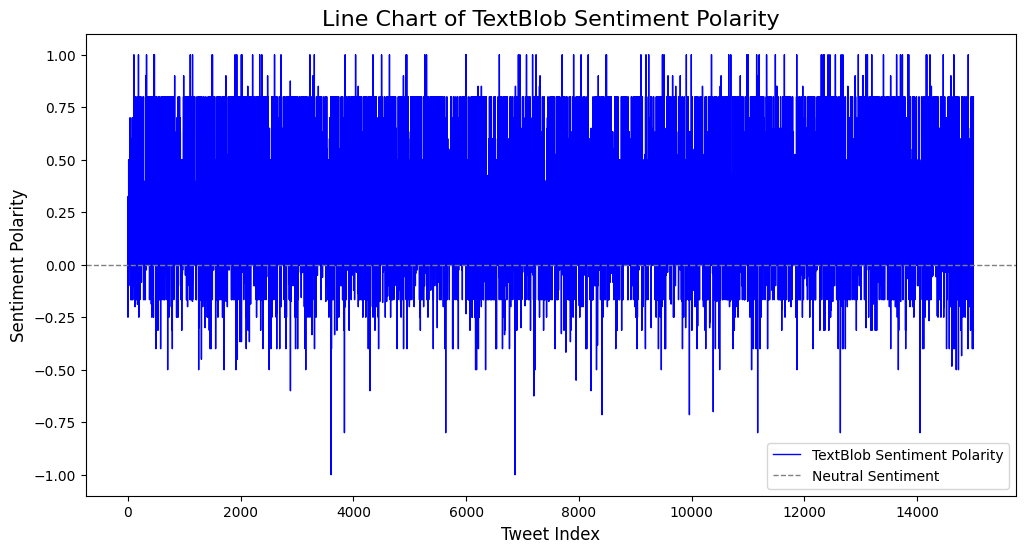

In [18]:
import matplotlib.pyplot as plt

# Plot the sentiment scores (TextBlob polarity) as a line chart
plt.figure(figsize=(12, 6))

# Line chart of sentiment polarity
plt.plot(df.index, df['sentiment_tb'], label='TextBlob Sentiment Polarity', color='blue', linewidth=1)

# Add a horizontal line for neutral sentiment (0.0)
plt.axhline(y=0.0, color='gray', linestyle='--', linewidth=1, label='Neutral Sentiment')

# Add labels and title
plt.title('Line Chart of TextBlob Sentiment Polarity', fontsize=16)
plt.xlabel('Tweet Index', fontsize=12)
plt.ylabel('Sentiment Polarity', fontsize=12)

# Add a legend
plt.legend()

# Show the plot
plt.show()


In [14]:
import pandas as pd

# Specify the file path
file_path = 'tweets_sentiment_comparison.csv'

# Load the dataset
data = pd.read_csv(file_path)

# View the first few rows
data.head()

,Unnamed: 0,text,favorited,favoriteCount,replyToSN,created,truncated,replyToSID,id,replyToUID,...,isRetweet,retweeted,longitude,latitude,clean_text,processed_text,sentiment_tb,sentiment_vader,sentiment_label_vader,sentiment_label_tb
0,1,RT @mrvelstan: literally nobody:\r\nme:\r\n\r\...,False,0,NaN,23/4/2019 10:43,False,NaN,1.120640e+18,NaN,...,True,False,NaN,NaN,literally nobody me,literally nobody,0.00,0.0000,Neutral,Neutral
1,2,"RT @agntecarter: i’m emotional, sorry!!\r\n\r\...",False,0,NaN,23/4/2019 10:43,False,NaN,1.120640e+18,NaN,...,True,False,NaN,NaN,i’m emotional sorry x,emotional sorry x,-0.25,0.0772,Positive,Negative
2,3,saving these bingo cards for tomorrow \r\n©\r\...,False,0,NaN,23/4/2019 10:43,False,NaN,1.120640e+18,NaN,...,False,False,NaN,NaN,saving these bingo cards for tomorrow,saving bingo card tomorrow,0.00,0.0000,Neutral,Neutral
3,4,RT @HelloBoon: Man these #AvengersEndgame ads ...,False,0,NaN,23/4/2019 10:43,False,NaN,1.120640e+18,NaN,...,True,False,NaN,NaN,man these ads are everywhere,man ad everywhere,0.00,0.0000,Neutral,Neutral
4,5,"RT @Marvel: We salute you, @ChrisEvans! #Capta...",False,0,NaN,23/4/2019 10:43,False,NaN,1.120640e+18,NaN,...,True,False,NaN,NaN,we salute you,salute,0.00,0.0000,Neutral,Neutral


### TextBlob vs VADER Key Differences and Comparison
#### _______________________________________________________________
#### Graph 1: Sentiment Distribution (Bar Chart)
#### Comparing counts of Positive, Neutral, and Negative tweets.

#### TextBlob tends to be more Neutral.
#### VADER captures more Positive and Negative tweets accurately.

#### _______________________________________________________________
#### Graph 2: Sentiment Score Distribution (Histogram)
#### Overlapping histogram of sentiment scores (Blue = TextBlob, Red = VADER).

#### TextBlob scores are clustered around Neutral (0.0).
#### VADER provides a more spread-out score distribution.

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Available columns: Index(['Unnamed: 0', 'text', 'favorited', 'favoriteCount', 'replyToSN',
       'created', 'truncated', 'replyToSID', 'id', 'replyToUID',
       'statusSource', 'screenName', 'retweetCount', 'isRetweet', 'retweeted',
       'longitude', 'latitude', 'clean_text', 'processed_text'],
      dtype='object')
               processed_text  sentiment_tb sentiment_label_tb  \
0            literally nobody          0.00            Neutral   
1           emotional sorry x         -0.25           Negative   
2  saving bingo card tomorrow          0.00            Neutral   
3           man ad everywhere          0.00            Neutral   
4                      salute          0.00            Neutral   

   sentiment_vader sentiment_label_vader  
0           0.0000               Neutral  
1           0.0772              Positive  
2           0.0000               Neutral  
3           0.0000               Neutral  
4           0.0000               Neutral  


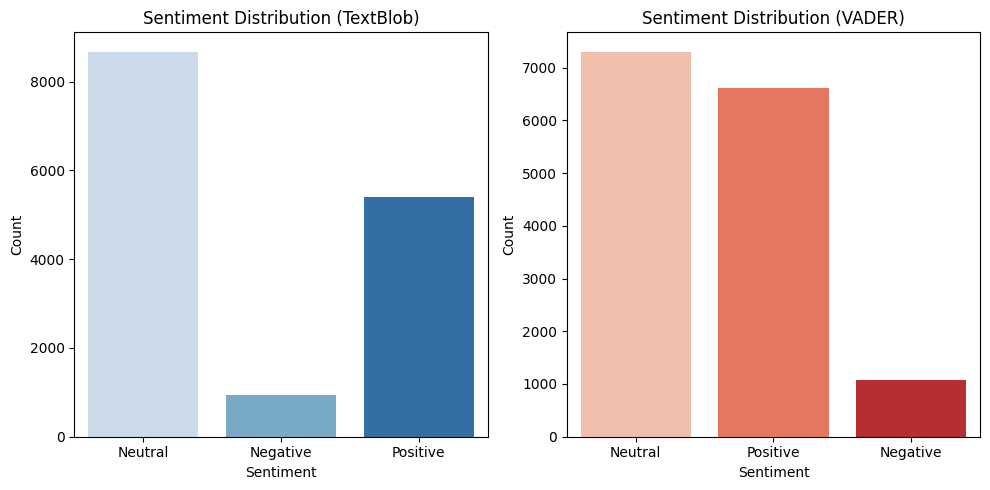

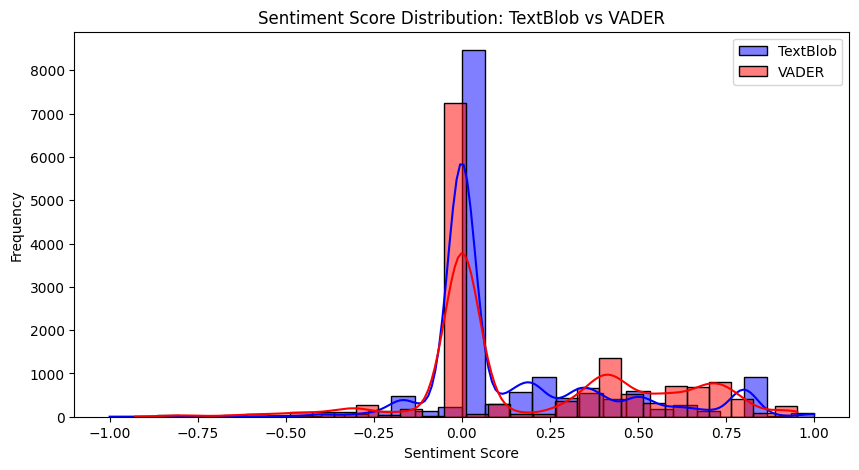

Sentiment analysis results saved to 'tweets_sentiment_comparison.csv'.


In [22]:
import pandas as pd
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
from nltk.sentiment.vader import SentimentIntensityAnalyzer

nltk.download('vader_lexicon')
nltk.download('punkt')

df = pd.read_csv('tweets_processed.csv')

print("Available columns:", df.columns)

if 'processed_text' in df.columns:

    df['sentiment_tb'] = df['processed_text'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)

    sid = SentimentIntensityAnalyzer()
    df['sentiment_vader'] = df['processed_text'].apply(lambda x: sid.polarity_scores(str(x))['compound'])

    def classify_sentiment(score):
        if score > 0.05:
            return "Positive"
        elif score < -0.05:
            return "Negative"
        else:
            return "Neutral"

    df['sentiment_label_tb'] = df['sentiment_tb'].apply(classify_sentiment)
    df['sentiment_label_vader'] = df['sentiment_vader'].apply(classify_sentiment)

    print(df[['processed_text', 'sentiment_tb', 'sentiment_label_tb', 'sentiment_vader', 'sentiment_label_vader']].head())

    plt.figure(figsize=(10, 5))

    # Plot for TextBlob
    plt.subplot(1, 2, 1)
    sns.countplot(data=df, x='sentiment_label_tb', hue='sentiment_label_tb', palette='Blues', legend=False)
    plt.title("Sentiment Distribution (TextBlob)")
    plt.xlabel("Sentiment")
    plt.ylabel("Count")

    # Plot for VADER
    plt.subplot(1, 2, 2)
    sns.countplot(data=df, x='sentiment_label_vader', hue='sentiment_label_vader', palette='Reds', legend=False)
    plt.title("Sentiment Distribution (VADER)")
    plt.xlabel("Sentiment")
    plt.ylabel("Count")

    # Show both graphs
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(10, 5))

    # Plot for TextBlob
    sns.histplot(df['sentiment_tb'], bins=30, kde=True, color='blue', label="TextBlob")
    
    # Plot for VADER
    sns.histplot(df['sentiment_vader'], bins=30, kde=True, color='red', label="VADER")

    plt.title("Sentiment Score Distribution: TextBlob vs VADER")
    plt.xlabel("Sentiment Score")
    plt.ylabel("Frequency")
    plt.legend()
    plt.show()

    df.to_csv('tweets_sentiment_comparison.csv', index=False)
    print("Sentiment analysis results saved to 'tweets_sentiment_comparison.csv'.")

else:
    print("The column 'processed_text' does not exist in the DataFrame. Please check your dataset.")


In [23]:
import pandas as pd

# Load the dataset
df = pd.read_csv('tweets_sentiment_comparison.csv')

# Adjust display options to show full text
pd.set_option('display.max_colwidth', None)

# Display the first 60 rows of the 'processed_text' column
print(df[['processed_text']].head(60))


                                                                     processed_text
0                                                                  literally nobody
1                                                                 emotional sorry x
2                                                        saving bingo card tomorrow
3                                                                 man ad everywhere
4                                                                            salute
5                          first critic reaction nearly exceptionally positive many
6                                                                        ready rock
7                                                                      til end line
8                                            first reaction emotional epic mcu film
9                                                                 man ad everywhere
10                                                      destiny arrived josh

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


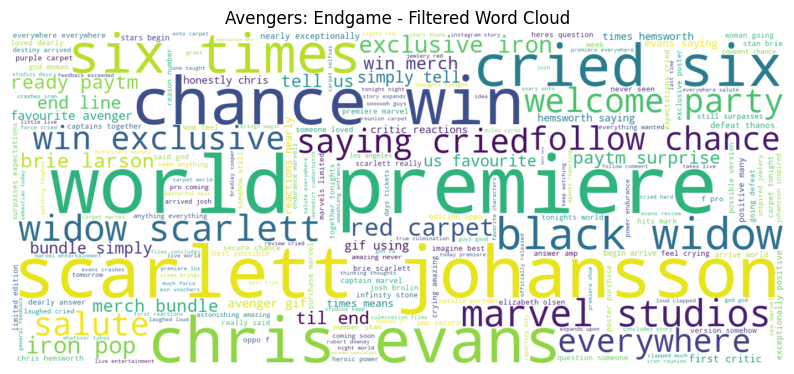

In [1]:
import pandas as pd
import nltk
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from wordcloud import WordCloud

# Download necessary NLTK resources if not already done
nltk.download('punkt')
nltk.download('stopwords')

# Load dataset
df = pd.read_csv('tweets_cleaned.csv')

# Define standard stopwords and custom words to remove
stop_words = set(stopwords.words('english'))
custom_stopwords = {"’", "…", "ads", "rt", "man", "like", "get", "movie", "film", "avengers", "endgame"}  # Add any other unnecessary words

# Tokenization and stopwords removal
df['tokens'] = df['clean_text'].apply(lambda x: word_tokenize(str(x).lower()))  # Convert text to lowercase and tokenize

# Remove standard stopwords, custom words, and non-alphabetic tokens
df['filtered_tokens'] = df['tokens'].apply(lambda x: [word for word in x if word.isalpha() and word not in stop_words and word not in custom_stopwords])

# Combine all filtered tokens into a single text for Word Cloud
all_text = ' '.join([' '.join(tokens) for tokens in df['filtered_tokens']])

# Generate Word Cloud
wordcloud = WordCloud(width=1400, height=600, background_color='white').generate(all_text)

# Display the Word Cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Avengers: Endgame - Filtered Word Cloud')
plt.show()


In [33]:
pip install torch transformers flair

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


### Difference Between Hugging Face, Flair, and Classic BERT Embeddings
#### __________________________________________________________________________________________
#### 1️⃣ Hugging Face (Transformers - BERT)
#### ✅ Uses Pre-trained Transformer Models (e.g., bert-base-uncased, roberta-base).
#### ✅ Provides contextual word & sentence embeddings.
#### ✅ Best for transfer learning, fine-tuning, and deep NLP tasks.
#### ✅ Works well with deep learning frameworks like PyTorch & TensorFlow.
#### ❌ Requires more memory & computation (GPU recommended).
#### __________________________________________________________________________________________

#### 2️⃣ Flair (TransformerDocumentEmbeddings)
#### ✅ Uses a simpler API to access transformer-based embeddings (e.g., bert-base-uncased).
#### ✅ Automatically handles tokenization & encoding.
#### ✅ Good for sentence-level embeddings & sequence labeling (NER, POS tagging).
#### ✅ Requires less manual preprocessing than Hugging Face.
#### ❌ Limited model selection compared to Hugging Face.
#### __________________________________________________________________________________________

#### 3️⃣ Classic BERT (last_hidden_state[:, 0, :])
#### ✅ Uses the [CLS] token representation as the sentence embedding.
#### ✅ Extracts embeddings manually using PyTorch.
#### ✅ More control over embeddings (can use different layers).
#### ✅ Better suited for research & fine-tuning.
#### ❌ Requires manual preprocessing & implementation.
#### __________________________________________________________________________________________

In [6]:
import torch
import pandas as pd
from transformers import AutoTokenizer, AutoModel
from flair.embeddings import TransformerDocumentEmbeddings
from flair.data import Sentence
import nltk
from nltk.tokenize import word_tokenize

# Download NLTK tokenizer
nltk.download('punkt')

df = pd.read_csv('tweets_sentiment_comparison.csv')

if 'processed_text' not in df.columns:
    raise ValueError("The column 'processed_text' is missing in the dataset.")

sentences = df['processed_text'].dropna().tolist()[:50]  # Use the first 50 non-null sentences

def get_huggingface_embedding(sentence, model_name="bert-base-uncased"):
    tokenizer = AutoTokenizer.from_pretrained(model_name)
    model = AutoModel.from_pretrained(model_name)

    inputs = tokenizer(sentence, return_tensors="pt", padding=True, truncation=True)

    with torch.no_grad():
        outputs = model(**inputs)

    cls_embedding = outputs.last_hidden_state[:, 0, :]
    return cls_embedding.squeeze().tolist()[:5]  # First 5 dimensions for readability

def get_flair_embedding(sentence, model_name="bert-base-uncased"):
    flair_model = TransformerDocumentEmbeddings(model_name)
    flair_sentence = Sentence(sentence)
    flair_model.embed(flair_sentence)
    return flair_sentence.get_embedding().tolist()[:5]  # First 5 dimensions for readability

def get_bert_embedding(sentence, model_name="bert-base-uncased"):
    tokenizer = AutoTokenizer.from_pretrained(model_name)
    model = AutoModel.from_pretrained(model_name)

    inputs = tokenizer(sentence, return_tensors="pt", padding=True, truncation=True)

    with torch.no_grad():
        outputs = model(**inputs)

    return outputs.last_hidden_state[:, 0, :].squeeze().tolist()[:5]  # First 5 dimensions

results = []
for sentence in sentences:
    hf_embedding = get_huggingface_embedding(sentence)
    flair_embedding = get_flair_embedding(sentence)
    bert_embedding = get_bert_embedding(sentence)

    results.append([sentence, hf_embedding, flair_embedding, bert_embedding])

df_embeddings = pd.DataFrame(results, columns=["Sentence", "Hugging Face (BERT)", "Flair (BERT)", "Classic BERT"])
print(df_embeddings)

df_embeddings.to_csv("tweets_embeddings_comparison.csv", index=False)
print("Embeddings saved to 'tweets_embeddings_comparison.csv'.")


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


                                             Sentence  \
0                                    literally nobody   
1                                   emotional sorry x   
2                          saving bingo card tomorrow   
3                                   man ad everywhere   
4                                              salute   
5   first critic reaction nearly exceptionally pos...   
6                                          ready rock   
7                                        til end line   
8              first reaction emotional epic mcu film   
9                                   man ad everywhere   
10                        destiny arrived josh brolin   
11                                             salute   
12       scarlett johansson brie larson defeat thanos   
13       heyy yall please share pic make sure use tag   
14  first last public event original six together ...   
15  boy two fucker beat holy shit outta feeling ne...   
16                             

C:\Users\User\AppData\Local\Temp\ipykernel_20884\1545656496.py:24: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


<Figure size 1200x600 with 0 Axes>

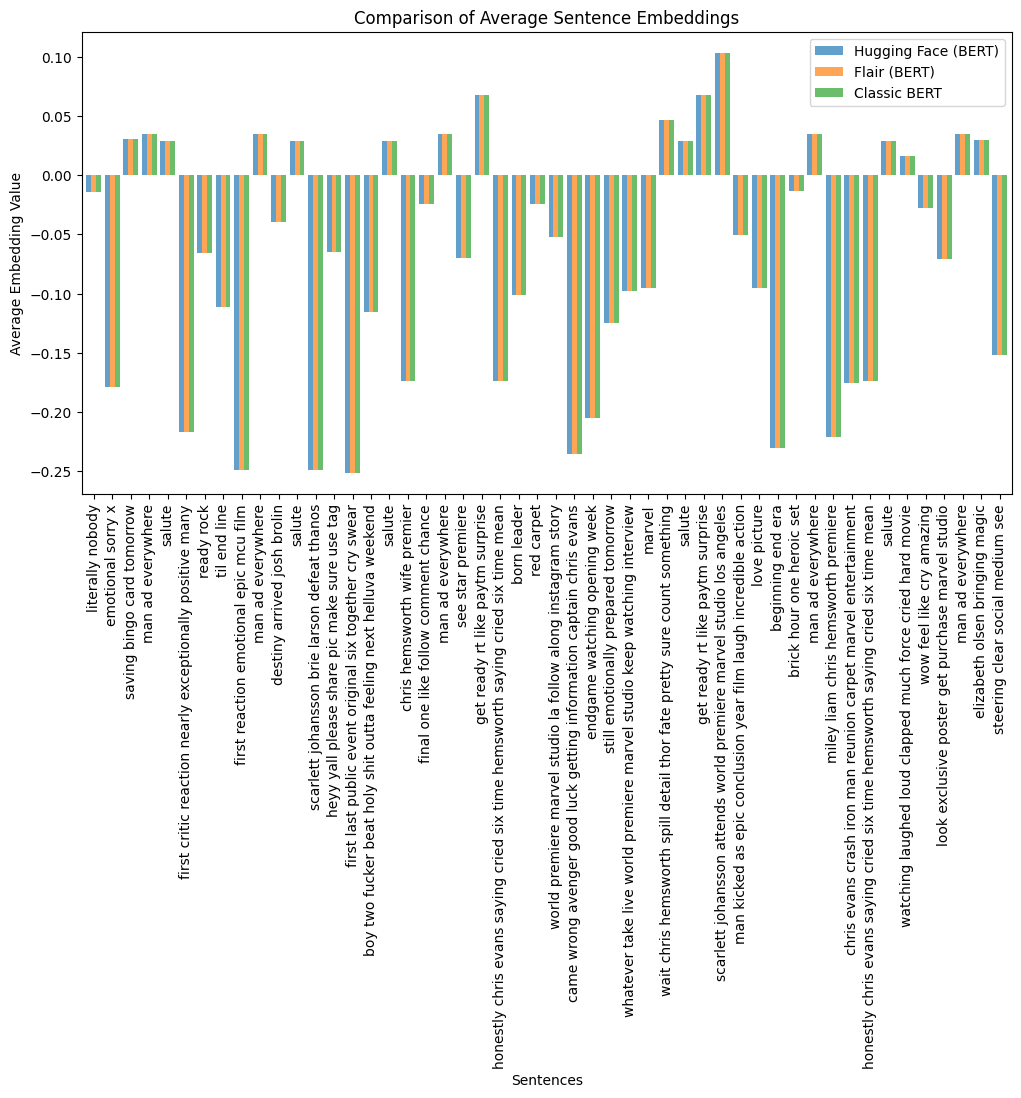

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df_embeddings = pd.read_csv("tweets_embeddings_comparison.csv")

df_embeddings["Hugging Face (BERT)"] = df_embeddings["Hugging Face (BERT)"].apply(lambda x: eval(x))
df_embeddings["Flair (BERT)"] = df_embeddings["Flair (BERT)"].apply(lambda x: eval(x))
df_embeddings["Classic BERT"] = df_embeddings["Classic BERT"].apply(lambda x: eval(x))

df_embeddings["Hugging Face Avg"] = df_embeddings["Hugging Face (BERT)"].apply(lambda x: sum(x) / len(x))
df_embeddings["Flair Avg"] = df_embeddings["Flair (BERT)"].apply(lambda x: sum(x) / len(x))
df_embeddings["Classic BERT Avg"] = df_embeddings["Classic BERT"].apply(lambda x: sum(x) / len(x))

df_avg = df_embeddings[["Sentence", "Hugging Face Avg", "Flair Avg", "Classic BERT Avg"]]

plt.figure(figsize=(12, 6))
df_avg.set_index("Sentence").plot(kind="bar", figsize=(12, 6), width=0.8, alpha=0.7)
plt.title("Comparison of Average Sentence Embeddings")
plt.xlabel("Sentences")
plt.ylabel("Average Embedding Value")
plt.legend(["Hugging Face (BERT)", "Flair (BERT)", "Classic BERT"])
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

